YlGnBu-8
8 colors palette
    1. #ffffd9
    2. #edf8b1
    3. #c7e9b4
    4. #7fcdbb
    5. #41b6c4
    6. #1d91c0
    7. #225ea8
    8. #0c2c84

Touch frequency kiss last week
Touch frequency put arm around shoulder last week
Touch frequency intimate hug last week

How often have you and your partner touched each other in this way in the last week?

From Yvonee

Key predictors of higher touch frequency were
1. higher Relationship Satisfaction
2. more positive communication
3. shorter relationship duration
4. the absence of children
5. living together
6. younger age


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [2]:
# Read data (output from FReDA_Touch_genVariables_final.do)
df = pd.read_csv('source/FReDA.csv')

In [3]:
# Variables to map columns
# New values could be assigned as 'in-between' values to ease plotting and calculations
overall_options = {
    'index_options': {
        '0x': 0,
        '1-5x': 1,
        '6-10x': 2,
        '11-20x': 3,
        '21-50x': 4,
        '> 50x': 5
    },
    'omo_options': {
        'Not at all': 0,
        '1 to 5 times': 1,
        '6 to 10 times': 2,
        '11 to 20 times': 3,
        '21 to 50 times': 4,
        'More than 50 times': 5
    },
    'satisfaction_options': {
        '0 - Not at all satisfied': 0,
        '1': 2,
        '2': 2,
        '3': 4,
        '4': 4,
        '5': 6,
        '6': 6,
        '7': 8,
        '8': 8,
        '9': 10,
        '10 - Completely satisfied': 10
    },
    'duration_options': {
        '0-2': 1,
        '3-5': 2,
        '6-10': 3,
        '11-20': 4,
        '21+': 5,
    },
    'kids_options': {
        '0': 0,
        '1': 1,
        '2': 2,
        '3+': 3,
    },
    'Loneliness_options': {
        '1 - Not at all': 1,
        '2': 2,
        '3': 3,
        '4': 4,
        '5 - Absolutely': 5
    },
    'cohabitation-options': {
        'Cohabiting': 1,
        'Separate households': 2,
    }
}

In [4]:
rename_columns = {
    'omo15i1_w2b': 'Anchor kiss frequency',
    'omo15i2_w2b': 'Anchor kiss wish',
    'pomo15i1_w2b': 'Partner kiss frequency',
    'pomo15i2_w2b': 'Partner kiss wish',
    'omo16i1_w2b': 'Anchor hold frequency',
    'omo16i2_w2b': 'Anchor hold wish',
    'pomo16i1_w2b': 'Partner hold frequency',
    'pomo16i2_w2b': 'Partner hold wish',
    'omo17i1_w2b': 'Anchor hug frequency',
    'omo17i2_w2b': 'Anchor hug wish',
    'pomo17i1_w2b': 'Partner hug frequency',
    'pomo17i2_w2b': 'Partner hug wish',
    'relsat': 'Anchor Relationship Satisfaction',
    'relint': 'Anchor Communication Quality',
    'lifsat': 'Anchor Life Satisfaction',
    'prelsat': 'Partner Relationship Satisfaction',
    'prelint': 'Partner Communication Quality',
    'plifsat': 'Partner Life Satisfaction',
    'agediff_class': 'Age difference',
    'nkidsliv_class': 'Kids',
    'sex': 'Anchor sex',
    'psex': 'Partner sex',
    'age': 'Anchor Age',
    'page': 'Partner Age',
    'loneliness': 'Anchor Loneliness',
    'ploneliness': 'Partner Loneliness',
    'cohab': 'Cohabitation',
    'confm': 'Anchor conflict management',
    'pconfm': 'Partner conflict management',
    'extr': 'Anchor Extraversion',
    'agree': 'Anchor Agreeableness',
    'consc': 'Anchor Conscientiousness',
    'open': 'Anchor Openess',
    'neur': 'Anchor Neuroticism',
    'pextr': 'Partner Extraversion',
    'pagree': 'Partner Agreeableness',
    'pconsc': 'Partner Conscientiousness',
    'popen': 'Partner Openess',
    'pneur': 'Partner Neuroticism',
}

# Rename some columns to ease understanding
df = df.rename(
    columns=rename_columns
)
df = df.drop([
    'reldur', 'tf_kiss', 'ptf_kiss', 'tf_hold', 'tf_hug', 'ptf_kiss', 'ptf_hold', 'ptf_hug'], axis=1)

In [5]:
df['Id'] = np.arange(1, df.shape[0] + 1)

In [6]:
n = df['Id'].count()
print('Initial sample size =', n)

Initial sample size = 7100


In [7]:
# delete no answer
df = df[~df.isin(["No answer"]).any(axis=1)]

In [8]:
n = df['Id'].count()
print('Sample size after removing "No answer" =', n)

Sample size after removing "No answer" = 6807


"The three scales "Intimacy" [Intimität], "Apreciation" [Wertschätzung], and "Conflict" [Konflikt] were adapted from the "Network of Relationships Inventory (NRI)" (Furman & Buhrmester, 1985) and used in an abbreviated form and adapted by pairfam and Freda (Hank et al. 2024)."

(more detailed: In contrast to the original version of the NRI, the questions in this version were asked only concerning the relationship with the partner, and not to any other persons with whom the respondent has a relationship. Furthermore, to limit the volume of data collected, the individual scales have been shortened from three to two items each. The response format has five stages, as did the original, but in this version they reflect frequency (1=Never to 5=Very frequently).)

In [9]:
# Map target columns
# This will change categorical values such as '0-2' or '3-5' to numerical values: 1,2,3,etc...
df['Anchor Relationship Satisfaction'] = df['Anchor Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Partner Relationship Satisfaction'] = df['Partner Relationship Satisfaction'].map(
    overall_options["satisfaction_options"])
df['Anchor Life Satisfaction'] = df['Anchor Life Satisfaction'].map(overall_options["satisfaction_options"])
df['Partner Life Satisfaction'] = df['Partner Life Satisfaction'].map(overall_options["satisfaction_options"])

df['Anchor kiss frequency'] = df['Anchor kiss frequency'].map(overall_options["omo_options"])
df['Anchor hold frequency'] = df['Anchor hold frequency'].map(overall_options["omo_options"])
df['Anchor hug frequency'] = df['Anchor hug frequency'].map(overall_options["omo_options"])
df['Anchor kiss wish'] = df['Anchor kiss wish'].map(overall_options["omo_options"])
df['Anchor hold wish'] = df['Anchor hold wish'].map(overall_options["omo_options"])
df['Anchor hug wish'] = df['Anchor hug wish'].map(overall_options["omo_options"])

df['Partner kiss frequency'] = df['Partner kiss frequency'].map(overall_options["omo_options"])
df['Partner hold frequency'] = df['Partner hold frequency'].map(overall_options["omo_options"])
df['Partner hug frequency'] = df['Partner hug frequency'].map(overall_options["omo_options"])
df['Partner kiss wish'] = df['Partner kiss wish'].map(overall_options["omo_options"])
df['Partner hold wish'] = df['Partner hold wish'].map(overall_options["omo_options"])
df['Partner hug wish'] = df['Partner hug wish'].map(overall_options["omo_options"])

df['Relationship Length'] = df['reldur_class'].map(overall_options["duration_options"])
df['Kids'] = df['Kids'].map(overall_options['kids_options'])

df['Anchor Loneliness'] = df['Anchor Loneliness'].map(overall_options['Loneliness_options'])
df['Partner Loneliness'] = df['Partner Loneliness'].map(overall_options['Loneliness_options'])

df['Cohabitation'] = df['Cohabitation'].map(overall_options['cohabitation-options'])

In [10]:
# delete those with no relationship duration data
df = df[df['reldur_class'] != '.']
df = df[df['Anchor Age'] != -7]
df = df[df['Partner Age'] != -7]
df = df.dropna(subset=["reldur_class"]).reset_index(drop=True)

In [11]:
df = df.drop(['reldur_class'], axis=1)

In [12]:
n = df['Id'].count()
print('Sample size after removing missing "Age" =', n)

Sample size after removing missing "Age" = 6659


In [13]:
# Group anchor and partner by Age
for i in range(0, len(df)):
    if df['Anchor Age'][i] <= 20:
        df.loc[i, 'Anchor Age group'] = 1
    elif 20 < df['Anchor Age'][i] <= 30:
        df.loc[i, 'Anchor Age group'] = 2
    elif 30 < df['Anchor Age'][i] <= 40:
        df.loc[i, 'Anchor Age group'] = 3
    elif 40 < df['Anchor Age'][i] <= 50:
        df.loc[i, 'Anchor Age group'] = 4
    elif 50 < df['Anchor Age'][i]:
        df.loc[i, 'Anchor Age group'] = 5

for i in range(0, len(df)):
    if df['Partner Age'][i] <= 20:
        df.loc[i, 'Partner Age group'] = 1
    elif 20 < df['Partner Age'][i] <= 30:
        df.loc[i, 'Partner Age group'] = 2
    elif 30 < df['Partner Age'][i] <= 40:
        df.loc[i, 'Partner Age group'] = 3
    elif 40 < df['Partner Age'][i] <= 50:
        df.loc[i, 'Partner Age group'] = 4
    elif 50 < df['Partner Age'][i]:
        df.loc[i, 'Partner Age group'] = 5

In [14]:
# Calculate overall frequency of touch, given by the mean of the three types (kiss, hold, hug)
# Calculate simple difference first, wish - frequency -> This could change to wish / frequency but notice that there will be more NaN values given possible /0 operations

for i in range(0, len(df)):
    df.loc[i, 'Anchor Frequency of Touch'] = np.mean(
        [df['Anchor kiss frequency'][i], df['Anchor hold frequency'][i], df['Anchor hug frequency'][i]])
    df.loc[i, 'Partner Frequency of Touch'] = np.mean(
        [df['Partner kiss frequency'][i], df['Partner hold frequency'][i], df['Partner hug frequency'][i]])

    df.loc[i, 'Anchor Wish for Touch'] = np.mean(
        [df['Anchor kiss wish'][i], df['Anchor hold wish'][i], df['Anchor hug wish'][i]])
    df.loc[i, 'Partner Wish for Touch'] = np.mean(
        [df['Partner kiss wish'][i], df['Partner hold wish'][i], df['Partner hug wish'][i]])

    df.loc[i, 'Anchor kiss diff'] = df['Anchor kiss wish'][i] - df['Anchor kiss frequency'][i]
    df.loc[i, 'Anchor hold diff'] = df['Anchor hold wish'][i] - df['Anchor hold frequency'][i]
    df.loc[i, 'Anchor hug diff'] = df['Anchor hug wish'][i] - df['Anchor hug frequency'][i]

    df.loc[i, 'Partner kiss diff'] = df['Partner kiss wish'][i] - df['Partner kiss frequency'][i]
    df.loc[i, 'Partner hold diff'] = df['Partner hold wish'][i] - df['Partner hold frequency'][i]
    df.loc[i, 'Partner hug diff'] = df['Partner hug wish'][i] - df['Partner hug frequency'][i]

In [40]:
df2 = df.copy()

In [41]:
def clean_touch_values(series):
    return np.where(
        (series > 0) & (series < 1), 1,
        np.where((series < 0) & (series > -1), -1, np.round(series))
    )


var_names = [
    'Anchor Frequency of Touch',
    'Partner Frequency of Touch',
    'Anchor Wish for Touch',
    'Partner Wish for Touch'
]

for col in var_names:
    df2[col] = clean_touch_values(df[col])

In [42]:
for i in range(0, len(df2)):
    df2.loc[i, 'Anchor Perception of Touch'] = df2["Anchor Wish for Touch"][i] - df2["Anchor Frequency of Touch"][i]
    df2.loc[i, 'Partner Perception of Touch'] = df2["Partner Wish for Touch"][i] - df2["Partner Frequency of Touch"][i]

In [43]:
for i in range(0, len(df2)):

    df2.loc[i, "Anchor Deprivation of Touch"] = 0
    df2.loc[i, "Anchor Saturation of Touch"] = 0
    df2.loc[i, "Partner Deprivation of Touch"] = 0
    df2.loc[i, "Partner Saturation of Touch"] = 0

    if df2.loc[i, 'Anchor Perception of Touch'] < 0:
        df2.loc[i, 'Anchor Deprivation of Touch'] = df2.loc[i, 'Anchor Perception of Touch']
        df2.loc[i, 'Anchor Perception of Touch'] = 'Deprived'

    elif df2.loc[i, 'Anchor Perception of Touch'] > 0:
        df2.loc[i, 'Anchor Saturation of Touch'] = df2.loc[i, 'Anchor Perception of Touch']
        df2.loc[i, 'Anchor Perception of Touch'] = 'Satured'

    else:
        df2.loc[i, 'Anchor Perception of Touch'] = 'Just enough'

    if df2.loc[i, 'Partner Perception of Touch'] < 0:
        df2.loc[i, 'Partner Deprivation of Touch'] = df2.loc[i, 'Partner Perception of Touch']
        df2.loc[i, 'Partner Perception of Touch'] = 'Deprived'

    elif df2.loc[i, 'Partner Perception of Touch'] > 0:
        df2.loc[i, 'Partner Saturation of Touch'] = df2.loc[i, 'Partner Perception of Touch']
        df2.loc[i, 'Partner Perception of Touch'] = 'Satured'

    else:
        df2.loc[i, 'Partner Perception of Touch'] = 'Just enough'


In [44]:
for i in range(0, len(df2)):
    if df2['Anchor Frequency of Touch'][i] == df2['Partner Frequency of Touch'][i]:
        df2.loc[i, "Frequency Discrepancy"] = 0

    if df2['Anchor Frequency of Touch'][i] > df2['Partner Frequency of Touch'][i]:
        df2.loc[i, "Frequency Discrepancy"] = 1

    if df2['Anchor Frequency of Touch'][i] < df2['Partner Frequency of Touch'][i]:
        df2.loc[i, "Frequency Discrepancy"] = -1

    if (df2['Anchor Frequency of Touch'][i] > df2['Partner Frequency of Touch'][i]) and (
            df2['Anchor Frequency of Touch'][i] - df2['Partner Frequency of Touch'][i]) > 2:
        df2.loc[i, "Frequency Discrepancy"] = 2

    if (df2['Anchor Frequency of Touch'][i] < df2['Partner Frequency of Touch'][i]) and (
            df2['Anchor Frequency of Touch'][i] - df2['Partner Frequency of Touch'][i]) < -2:
        df2.loc[i, "Frequency Discrepancy"] = -2

    # # # ----------------------------------------------------------------------------------- # # #
    if df2['Anchor Wish for Touch'][i] == df2['Partner Wish for Touch'][i]:
        df2.loc[i, "Wish Discrepancy"] = 0

    if df2['Anchor Wish for Touch'][i] > df2['Partner Wish for Touch'][i]:
        df2.loc[i, "Wish Discrepancy"] = 1

    if df2['Anchor Wish for Touch'][i] < df2['Partner Wish for Touch'][i]:
        df2.loc[i, "Wish Discrepancy"] = -1

    if (df2['Anchor Wish for Touch'][i] > df2['Partner Wish for Touch'][i]) and (
            df2['Anchor Wish for Touch'][i] - df2['Partner Wish for Touch'][i]) > 2:
        df2.loc[i, "Wish Discrepancy"] = 2

    if (df2['Anchor Wish for Touch'][i] < df2['Partner Wish for Touch'][i]) and (
            df2['Anchor Wish for Touch'][i] - df2['Partner Wish for Touch'][i]) < -2:
        df2.loc[i, "Wish Discrepancy"] = -2

    # # # ----------------------------------------------------------------------------------- # # #
    # if df2['Anchor kiss frequency'][i] == df2['Partner kiss frequency'][i]:
    #     df2.loc[i, "kiss_diff"] = 0
    #
    # if df2['Anchor kiss frequency'][i] > df2['Partner kiss frequency'][i]:
    #     df2.loc[i, "kiss_diff"] = 1
    #
    # if df2['Anchor kiss frequency'][i] < df2['Partner kiss frequency'][i]:
    #     df2.loc[i, "kiss_diff"] = -1
    #
    # if (df2['Anchor kiss frequency'][i] > df2['Partner kiss frequency'][i]) and (
    #         df2['Anchor kiss frequency'][i] - df2['Partner kiss frequency'][i]) > 2:
    #     df2.loc[i, "kiss_diff"] = 2
    #
    # if (df2['Anchor kiss frequency'][i] < df2['Partner kiss frequency'][i]) and (
    #         df2['Anchor kiss frequency'][i] - df2['Partner kiss frequency'][i]) < -2:
    #     df2.loc[i, "kiss_diff"] = -2
    #
    # # --- Hold --- #
    # if df2['Anchor hold frequency'][i] == df2['Partner hold frequency'][i]:
    #     df2.loc[i, "hold_diff"] = 0
    #
    # if df2['Anchor hold frequency'][i] > df2['Partner hold frequency'][i]:
    #     df2.loc[i, "hold_diff"] = 1
    #
    # if df2['Anchor hold frequency'][i] < df2['Partner hold frequency'][i]:
    #     df2.loc[i, "hold_diff"] = -1
    #
    # if (df2['Anchor hold frequency'][i] > df2['Partner hold frequency'][i]) and (
    #         df2['Anchor hold frequency'][i] - df2['Partner hold frequency'][i]) > 2:
    #     df2.loc[i, "hold_diff"] = 2
    #
    # if (df2['Anchor hold frequency'][i] < df2['Partner hold frequency'][i]) and (
    #         df2['Anchor hold frequency'][i] - df2['Partner hold frequency'][i]) < -2:
    #     df2.loc[i, "hold_diff"] = -2
    #
    # # --- Intimacy (Hug) --- #
    # if df2['Anchor hug frequency'][i] == df2['Partner hug frequency'][i]:
    #     df2.loc[i, "hug_diff"] = 0
    #
    # if df2['Anchor hug frequency'][i] > df2['Partner hug frequency'][i]:
    #     df2.loc[i, "hug_diff"] = 1
    #
    # if df2['Anchor hug frequency'][i] < df2['Partner hug frequency'][i]:
    #     df2.loc[i, "hug_diff"] = -1
    #
    # if (df2['Anchor hug frequency'][i] > df2['Partner hug frequency'][i]) and (
    #         df2['Anchor hug frequency'][i] - df2['Partner hug frequency'][i]) > 2:
    #     df2.loc[i, "hug_diff"] = 2
    #
    # if (df2['Anchor hug frequency'][i] < df2['Partner hug frequency'][i]) and (
    #         df2['Anchor hug frequency'][i] - df2['Partner hug frequency'][i]) < -2:
    #     df2.loc[i, "hug_diff"] = -2

    # # # ----------------------------------------------------------------------------------- # # #

In [155]:
# https://tosinharold.medium.com/enhancing-correlation-matrix-heatmap-plots-with-p-values-in-python-41bac6a7fd77

In [45]:
# Calculate means for touch variables
for i in range(0, len(df2)):
    if df2['Anchor Frequency of Touch'][i] == 0:
        df2.loc[i, 'Anchor Given (count)'] = '0x'
    if 0 < df2['Anchor Frequency of Touch'][i] <= 1:
        df2.loc[i, 'Anchor Given (count)'] = '1-5x'
    if 1 < df2['Anchor Frequency of Touch'][i] <= 2:
        df2.loc[i, 'Anchor Given (count)'] = '6-10x'
    if 2 < df2['Anchor Frequency of Touch'][i] <= 3:
        df2.loc[i, 'Anchor Given (count)'] = '11-20x'
    if 3 < df2['Anchor Frequency of Touch'][i] <= 4:
        df2.loc[i, 'Anchor Given (count)'] = '21-50x'
    if 4 < df2['Anchor Frequency of Touch'][i] <= 5:
        df2.loc[i, 'Anchor Given (count)'] = '> 50x'

In [46]:
for i in range(0, len(df2)):
    if df2['Anchor Communication Quality'][i] <= 12:
        df2.loc[i, 'Anchor comm'] = 1
    elif 12 < df2['Anchor Communication Quality'][i] <= 17:
        df2.loc[i, 'Anchor comm'] = 2
    elif 17 < df2['Anchor Communication Quality'][i] <= 22:
        df2.loc[i, 'Anchor comm'] = 3
    elif 22 < df2['Anchor Communication Quality'][i] <= 26:
        df2.loc[i, 'Anchor comm'] = 4
    elif 27 < df2['Anchor Communication Quality'][i]:
        df2.loc[i, 'Anchor comm'] = 5

In [47]:
df2 = df2.dropna().reset_index(drop=True)
n = df2['Id'].count()
print('Sample size after drop NaN =', n)

Sample size after drop NaN = 5033


In [160]:
# pd.crosstab(df2["Frequency Discrepancy"], columns=df2['Anchor Frequency of Touch'])

In [161]:
# pd.crosstab(df2["Wish Discrepancy"], columns=df2['Anchor Wish for Touch'])

In [48]:
desired_order = {5: 'More than 50 times',
                 4: '21 to 50 times',
                 3: '11 to 20 times',
                 2: '6 to 10 times',
                 1: '1 to 5 times',
                 0: "Not at all"}
# reversed_list = desired_order[::-1]

colors = ["#1d91c0", "#41b6c4", "#7fcdbb", "#a1dab4", "#ffffd9", "#253494"]
reversed_colors = colors[::-1]

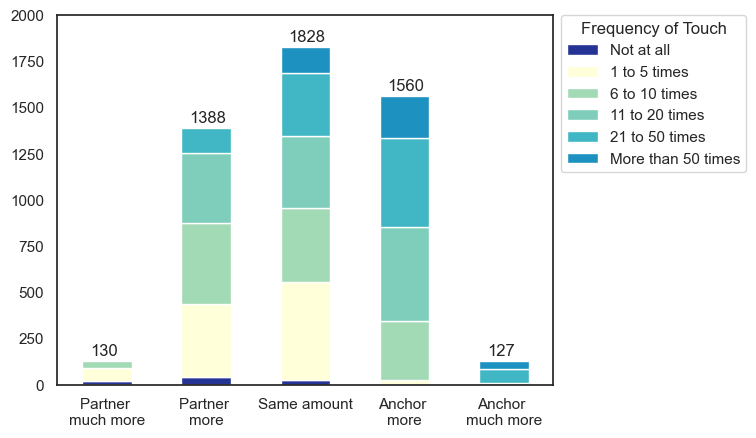

In [50]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Frequency Discrepancy'], df2['Anchor Frequency of Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
ax.legend(title='Frequency of Touch', bbox_to_anchor=(1, 1.02), loc='upper left')
#
a = df2.value_counts("Frequency Discrepancy").sort_index()
#
for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels)
plt.xlabel("")
plt.ylim([0, 2000])
plt.grid(False)
#
# plt.savefig('output/img_bg/comparisons/anchor_frequency_of_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

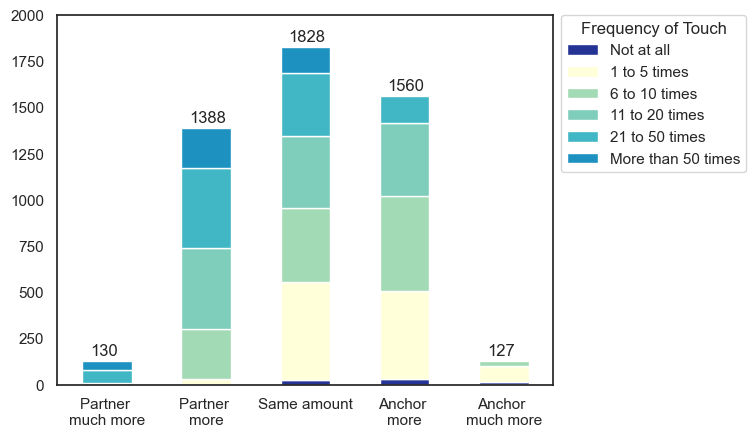

In [51]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Frequency Discrepancy'], df2['Partner Frequency of Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
ax.legend(title='Frequency of Touch', bbox_to_anchor=(1, 1.02), loc='upper left')

a = df2.value_counts("Frequency Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels)
plt.xlabel("")
plt.ylim([0, 2000])
plt.grid(False)
#
# plt.savefig('output/img_bg/comparisons/partner_frequency_of_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

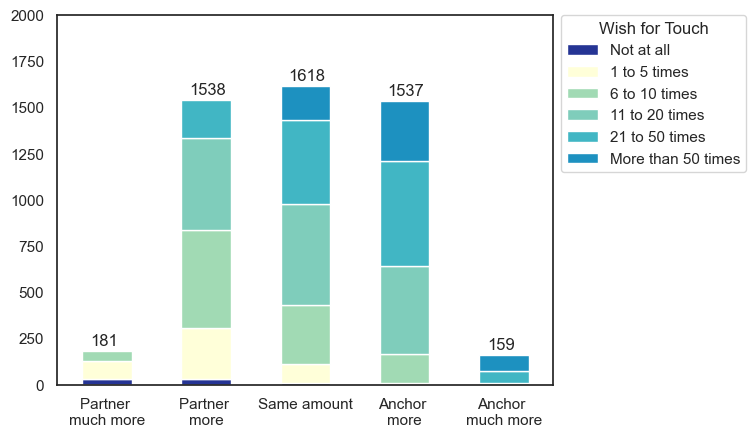

In [53]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Wish Discrepancy'], df2['Anchor Wish for Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
ax.legend(title='Wish for Touch', bbox_to_anchor=(1, 1.02), loc='upper left')
#
a = df2.value_counts("Wish Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels)
plt.xlabel("")
plt.ylim([0, 2000])
plt.grid(False)

# plt.savefig('output/img_bg/comparisons/anchor_wish_for_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

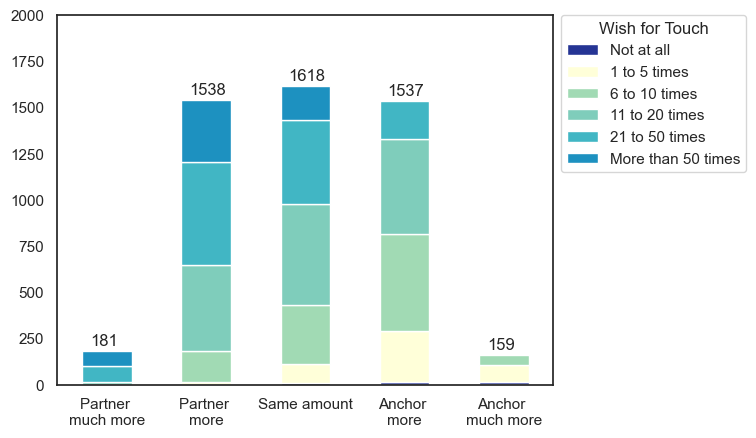

In [54]:
sns.set_theme(style='white')
ct = pd.crosstab(df2['Wish Discrepancy'], df2['Partner Wish for Touch'])
ct.rename(desired_order, axis='columns', inplace=True)

ax = ct.plot(kind='bar', stacked=True, rot=0, color=reversed_colors)
ax.legend(title='Wish for Touch', bbox_to_anchor=(1, 1.02), loc='upper left')

a = df2.value_counts("Wish Discrepancy").sort_index()

for i, label in enumerate(list(a)):
    ax.annotate(str(label), (i - 0.17, label + 30))

labels = ["Partner \nmuch more",
          "Partner \nmore",
          "Same amount",
          "Anchor \nmore",
          "Anchor \nmuch more"
          ]

plt.xticks(range(5), labels=labels)
plt.xlabel("")
plt.ylim([0, 2000])
plt.grid(False)

# plt.savefig('output/img_bg/comparisons/partner_wish_for_touch.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

CORRELATION MAPS

In [55]:
# ct = pd.crosstab(df2['Deprivation Discrepancy'], df2['Partner Deprivation of Touch'])
# ct.rename(desired_order, axis='columns', inplace=True)
# ct

In [56]:
# ct = pd.crosstab(df2['Excess Discrepancy'], df2['Anchor Excess of Touch'])
# ct.rename(desired_order, axis='columns', inplace=True)
# ct

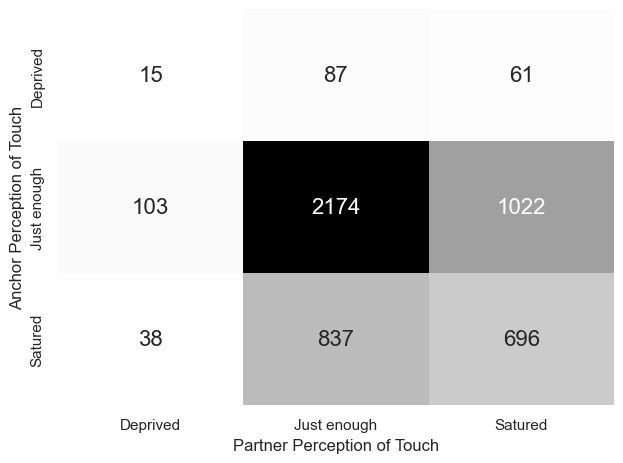

In [57]:
order = ['Deprived', 'Just enough', 'Satured']

df2['Anchor Perception of Touch'] = pd.Categorical(df2['Anchor Perception of Touch'], categories=order, ordered=True)
df2['Partner Perception of Touch'] = pd.Categorical(df2['Partner Perception of Touch'], categories=order, ordered=True)

crosstab = pd.crosstab(df2['Anchor Perception of Touch'], df2['Partner Perception of Touch'])

# plt.figure(figsize=(10, 6))
sns.heatmap(
    data=crosstab,
    annot=True,
    cmap='Greys',
    fmt='d',
    cbar=False,
    annot_kws={"fontsize": 16}

)
plt.tight_layout()
plt.savefig("output/img_bg/correlation/perception of touch.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

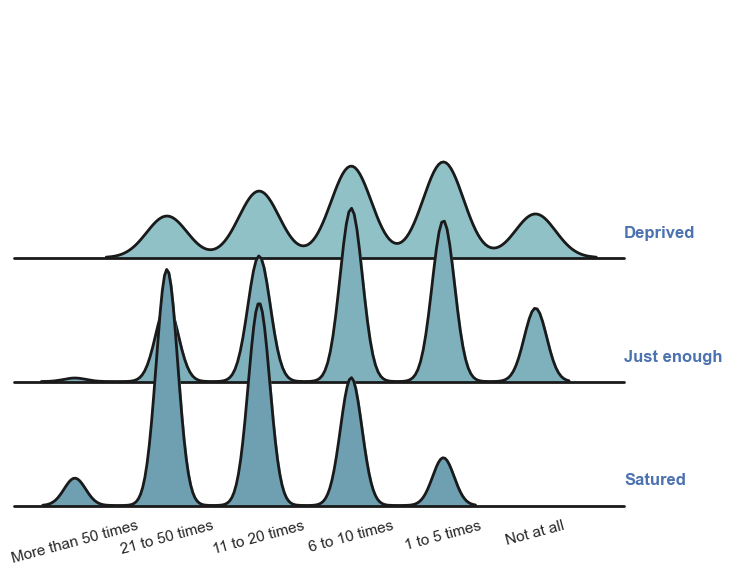

In [58]:
a = 'Anchor Perception of Touch'

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=df2,
                  row=a,
                  hue=a,
                  aspect=4,
                  height=2,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Anchor Frequency of Touch",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Anchor Frequency of Touch", color="k", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color="k", clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=[
               'More than 50 times',
               '21 to 50 times',
               '11 to 20 times',
               '6 to 10 times',
               '1 to 5 times',
               "Not at all"
           ], rotation=15
           )
plt.title("")
plt.savefig("output/img_bg/KDE_Perception-Freq.png", dpi=350, transparent=True, bbox_inches='tight')
plt.show()

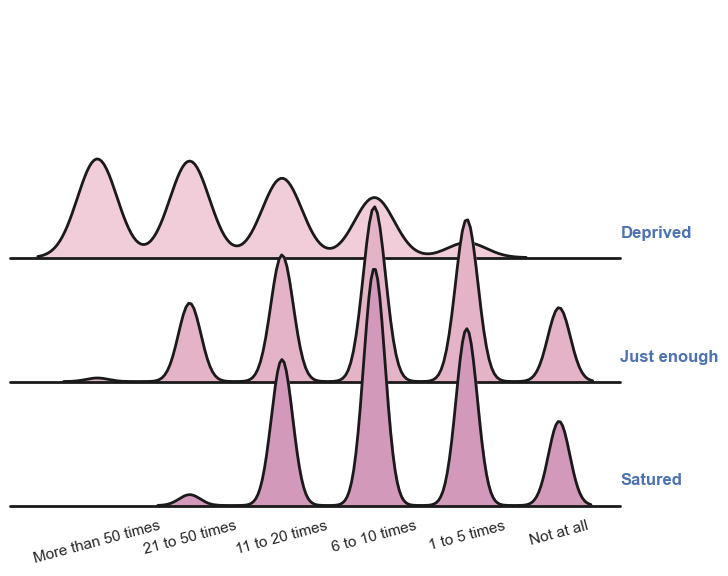

In [59]:

a = 'Anchor Perception of Touch'

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal_red = sns.cubehelix_palette(10, start=0.0, rot=0.3, light=0.85, dark=0.1, gamma=1.0, )
g = sns.FacetGrid(data=df2,
                  row=a,
                  hue=a,
                  aspect=4,
                  height=2,
                  palette=pal_red
                  )
g.map(sns.kdeplot,
      "Anchor Wish for Touch",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Anchor Wish for Touch", color="k", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color="k", clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
           labels=[
               'More than 50 times',
               '21 to 50 times',
               '11 to 20 times',
               '6 to 10 times',
               '1 to 5 times',
               "Not at all"
           ], rotation=15
           )
plt.title("")
plt.savefig("output/img_bg/KDE_Perception-Wish.png", dpi=350, transparent=True, bbox_inches='tight')
plt.show()

In [60]:
individual_factors = [
    'Anchor Frequency of Touch',
    'Anchor Wish for Touch',
    'Anchor Deprivation of Touch',
    'Anchor Saturation of Touch',

    'Anchor Age',
    'Anchor Life Satisfaction',
    'Anchor Loneliness',
    'Anchor Extraversion',
    'Anchor Agreeableness',
    'Anchor Conscientiousness',
    'Anchor Openess',
    'Anchor Neuroticism',
    'Partner Age',
    'Partner Life Satisfaction',
    'Partner Loneliness',
    'Partner Extraversion',
    'Partner Agreeableness',
    'Partner Conscientiousness',
    'Partner Openess',
    'Partner Neuroticism',
]

relationship_factors = [
    'Anchor Frequency of Touch',
    'Anchor Wish for Touch',
    'Anchor Deprivation of Touch',
    'Anchor Saturation of Touch',

    'Anchor Relationship Satisfaction',
    'Anchor Communication Quality',
    'Anchor conflict management',
    'Partner Relationship Satisfaction',
    'Partner Communication Quality',
    'Partner conflict management',
    'Relationship Length',
    'Kids',
    'Cohabitation',
]

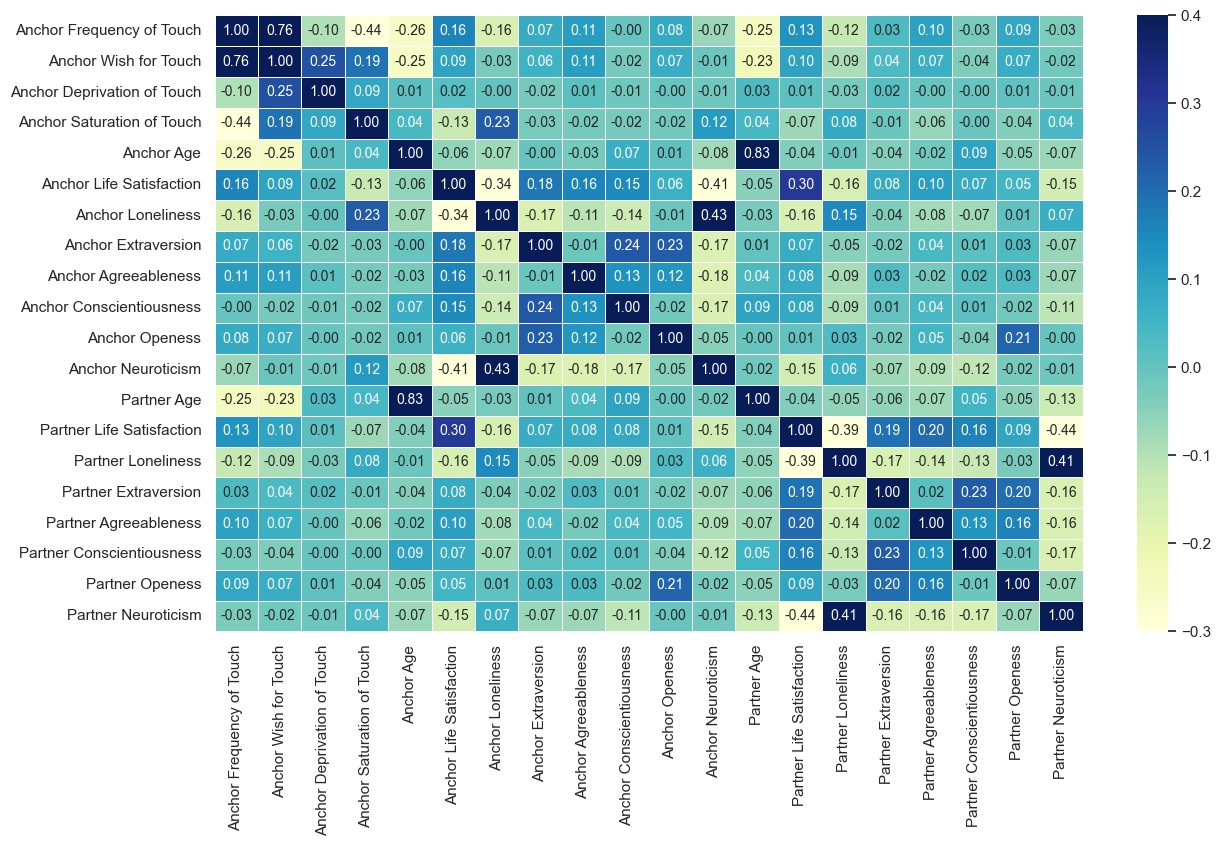

In [62]:
plt.figure(figsize=(14, 8))
plt.tight_layout()

correlation = df2[
    individual_factors
].corr()

sns.heatmap(correlation, cmap='YlGnBu', fmt='.2f',
            linewidths=0.5, vmax=0.4, vmin=-0.3, annot_kws={"size": 10},
            annot=True,
            )

plt.grid(False)
# plt.title('Moderators of touch behavior, wanting and deprivation')
plt.savefig('output/img_bg/correlation/individual_factors.png', dpi=350, transparent=False, bbox_inches='tight')

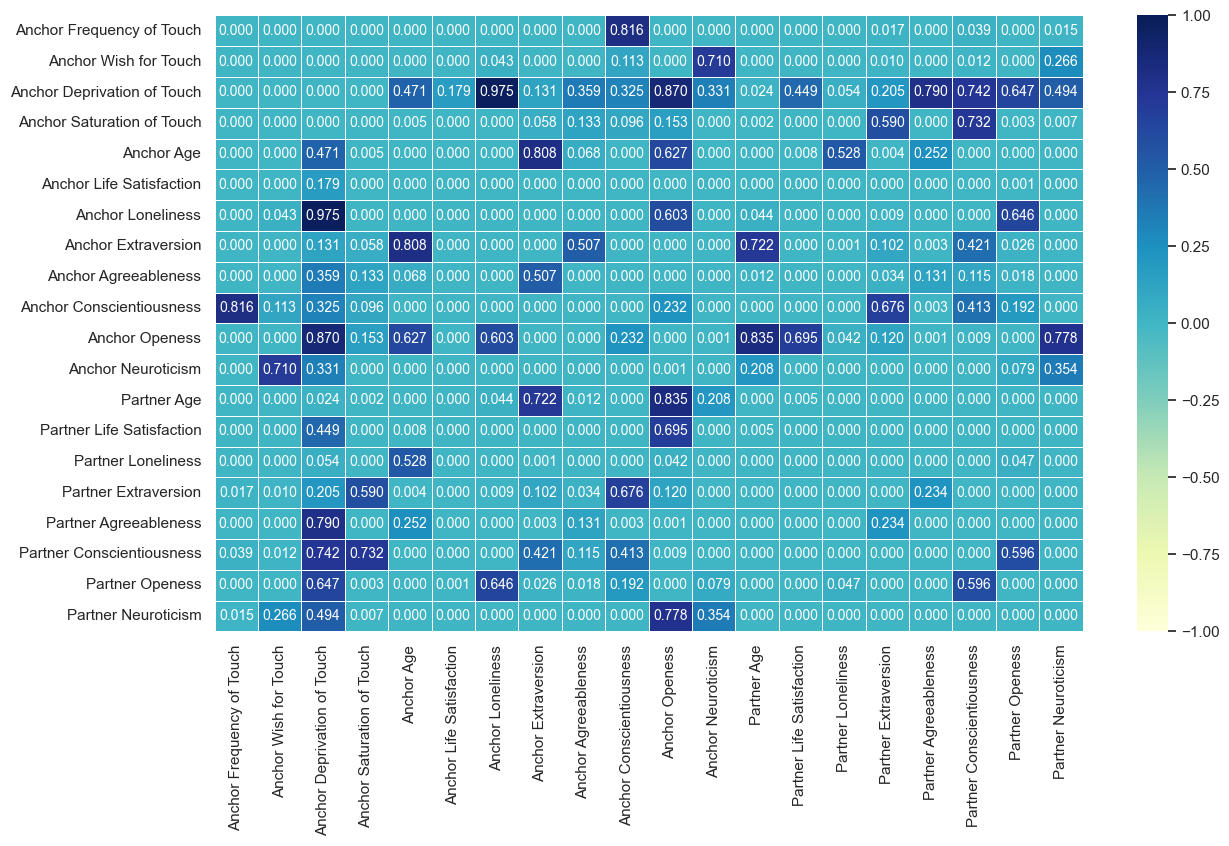

In [64]:
pvalues = df2[individual_factors].corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(
    len(df2[individual_factors].columns))
plt.figure(figsize=(14, 8))
plt.tight_layout()
sns.heatmap(pvalues, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5, vmax=1, vmin=-1, annot_kws={"size": 10})
plt.show()

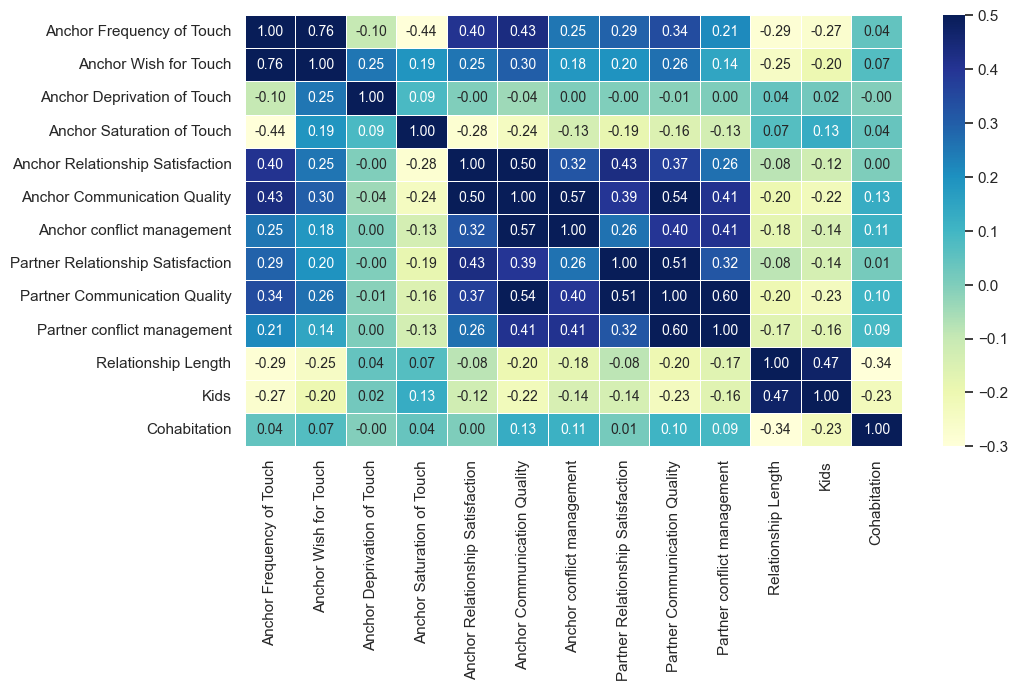

In [65]:
plt.figure(figsize=(10.6, 5.6))
plt.tight_layout()

correlation = df2[
    relationship_factors
].corr()

sns.heatmap(correlation, cmap='YlGnBu', fmt='.2f',
            linewidths=0.5, vmax=0.5, vmin=-0.3, annot_kws={"size": 10},
            annot=True,
            )
plt.grid(False)
# plt.title('Correlation Matrix of Touch, Desire, and Satisfaction (Pearson Correlation)')
plt.savefig('output/img_bg/correlation/relationship_factors.png', dpi=350, transparent=False, bbox_inches='tight')

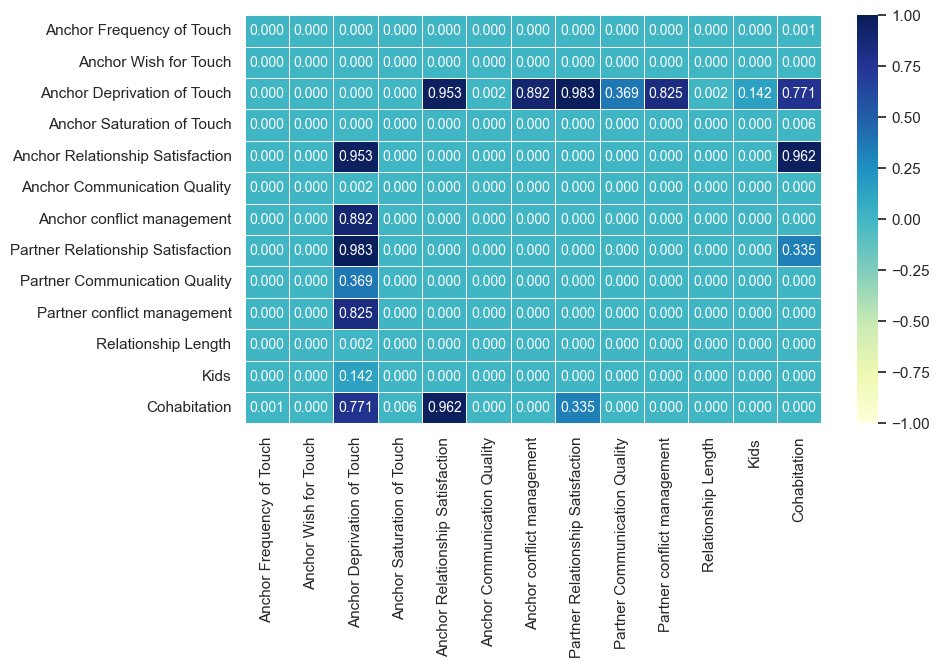

In [66]:
pvalues = df2[relationship_factors].corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(
    len(df2[relationship_factors].columns))
plt.figure(figsize=(9.3, 5.3))
plt.tight_layout()
sns.heatmap(pvalues, annot=True, cmap='YlGnBu', fmt='.3f', linewidths=0.5, vmax=1, vmin=-1, annot_kws={"size": 10})
plt.show()

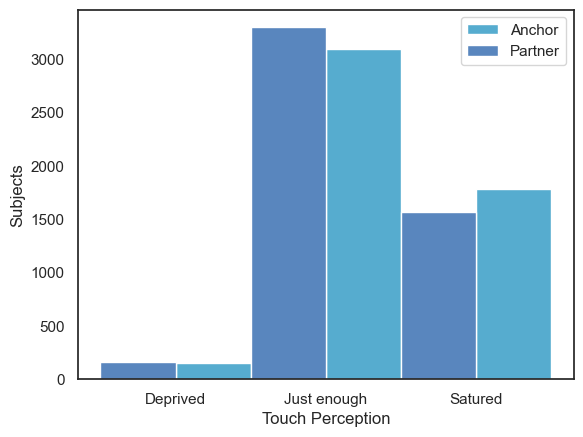

In [70]:
sns.set_theme(style='white')
df_melted = df2.melt(value_vars=['Anchor Perception of Touch', 'Partner Perception of Touch'],
                     var_name='Source', value_name='Value')

sns.histplot(data=df_melted, x='Value', hue='Source',
             element='bars',
             binwidth=1,
             palette=['#225ea8', '#1d91c0'],
             common_norm=False,
             multiple="dodge",
             )
plt.grid(False)
plt.legend(loc='upper right', labels=["Anchor", "Partner"])
plt.xlabel("Touch Perception")
plt.ylabel("Subjects")
plt.savefig('output/img_bg/perception_histogram.png', dpi=350, transparent=False, bbox_inches='tight')

In [71]:
def calculate_freq(input_var):
    n = df2[input_var].count()
    m = [
        np.sum(df2[input_var] < 1),
        np.sum((df2[input_var] >= 1) & (df2[input_var] < 2)),
        np.sum((df2[input_var] >= 2) & (df2[input_var] < 3)),
        np.sum((df2[input_var] >= 3) & (df2[input_var] < 4)),
        np.sum((df2[input_var] >= 4) & (df2[input_var] < 5)),
        np.sum(df2[input_var] >= 5)
    ]

    temp_df = pd.DataFrame({
        input_var: [round((m[0] * 100) / n, 2),
                    round((m[1] * 100) / n, 2),
                    round((m[2] * 100) / n, 2),
                    round((m[3] * 100) / n, 2),
                    round((m[4] * 100) / n, 2),
                    round((m[5] * 100) / n, 2)]
    },
        index=["Not at all",
               "1 to 5",
               "6 to 10",
               "11 to 20",
               "21 to 50",
               "> 50"])

    return temp_df


var_names = ['Anchor Frequency of Touch',
             'Anchor Wish for Touch',
             'Partner Frequency of Touch',
             'Partner Wish for Touch',
             'Anchor kiss frequency',
             'Anchor kiss wish',
             'Partner kiss frequency',
             'Partner kiss wish',
             'Anchor hold frequency',
             'Anchor hold wish',
             'Partner hold frequency',
             'Partner hold wish',
             'Anchor hug frequency',
             'Anchor hug wish',
             'Partner hug frequency',
             'Partner hug wish',
             ]

labels = ["Not at all",
          "1 to 5",
          "6 to 10",
          "11 to 20",
          "21 to 50",
          "> 50", ]
frequency_map = pd.DataFrame({}, index=labels)

for i, label in enumerate(var_names):
    a = calculate_freq(label)
    frequency_map = pd.concat([frequency_map, a], axis=1)

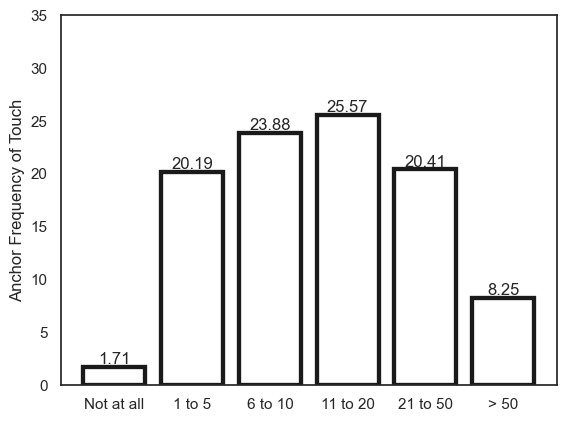

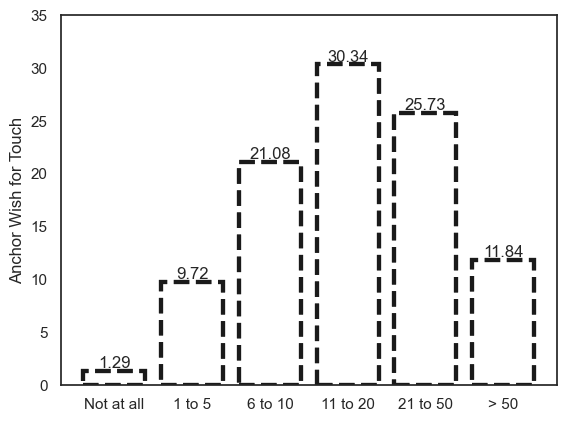

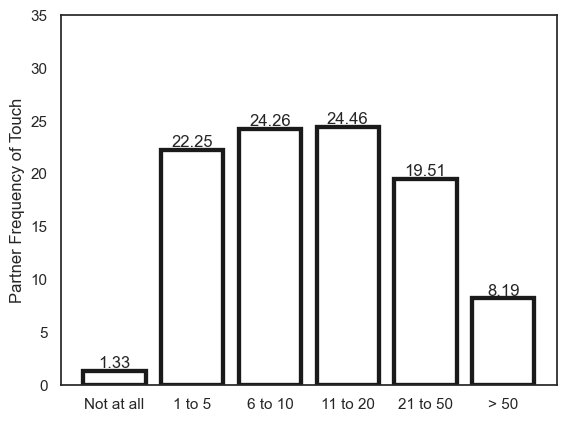

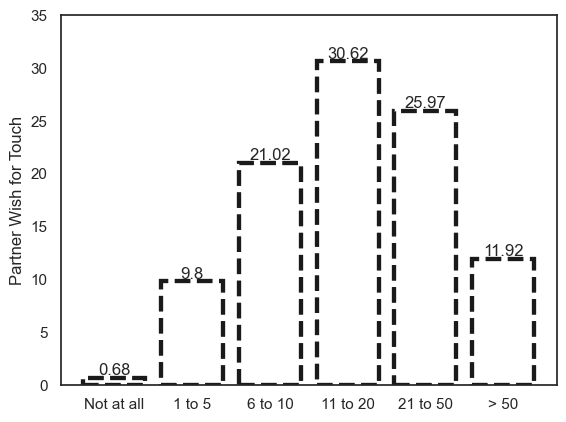

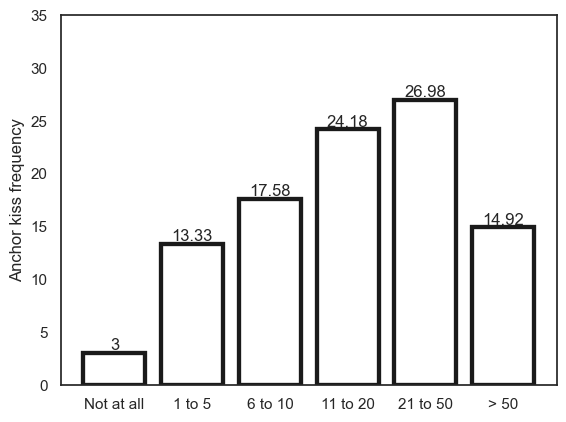

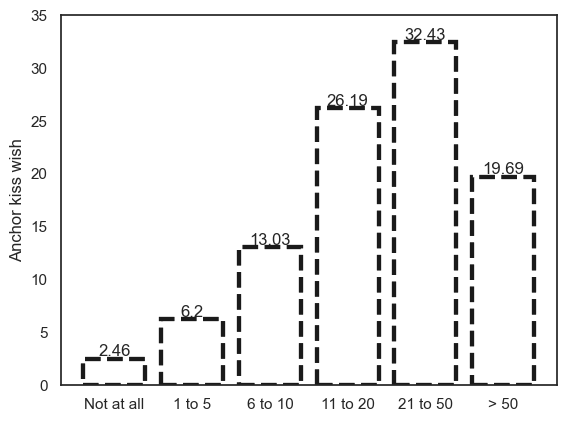

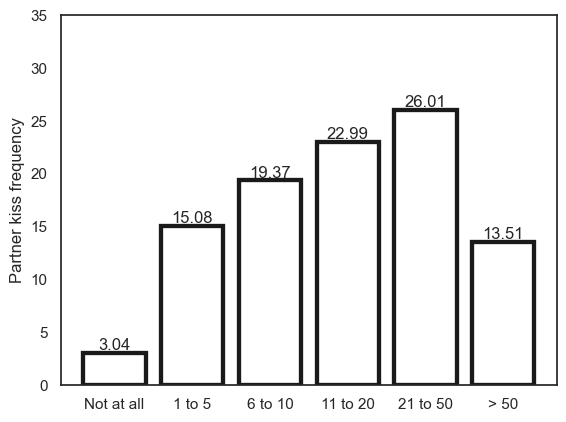

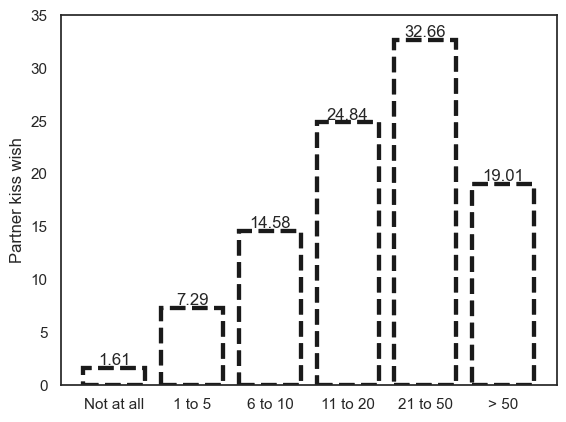

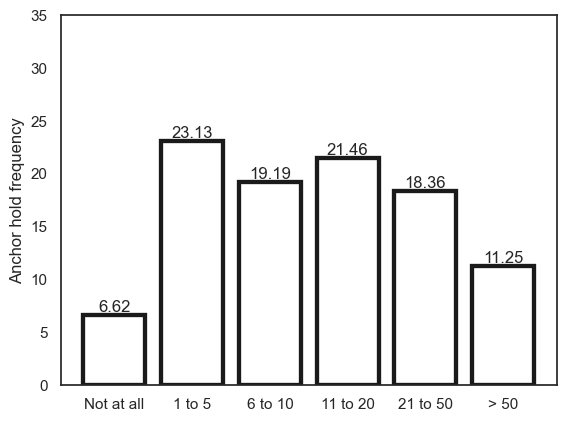

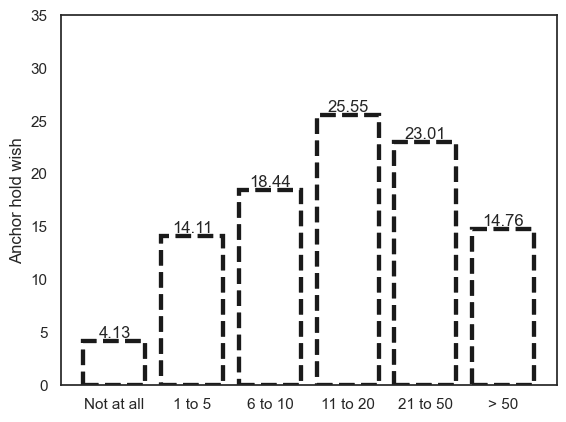

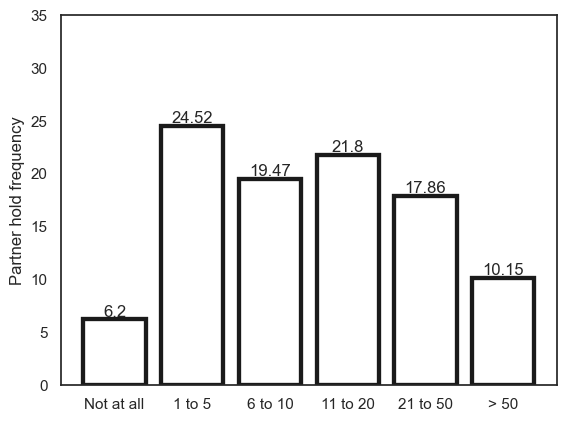

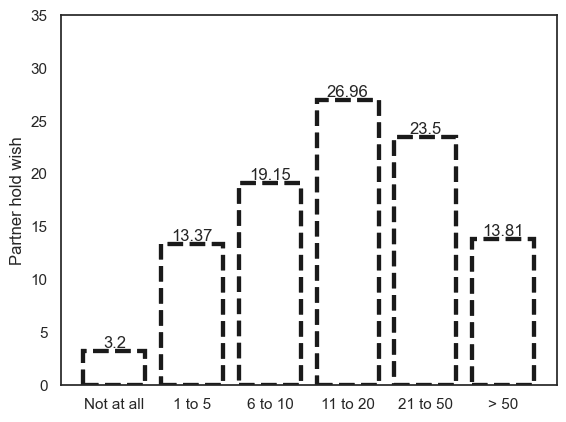

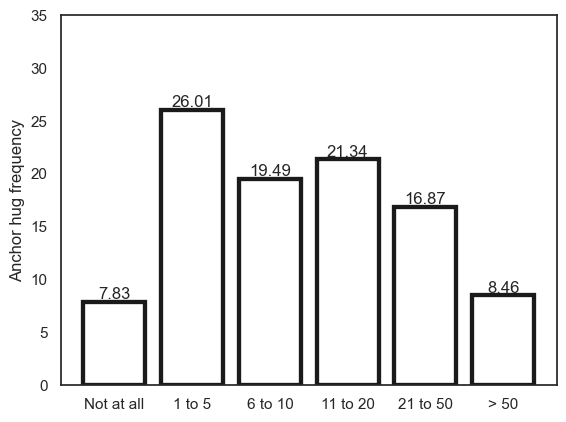

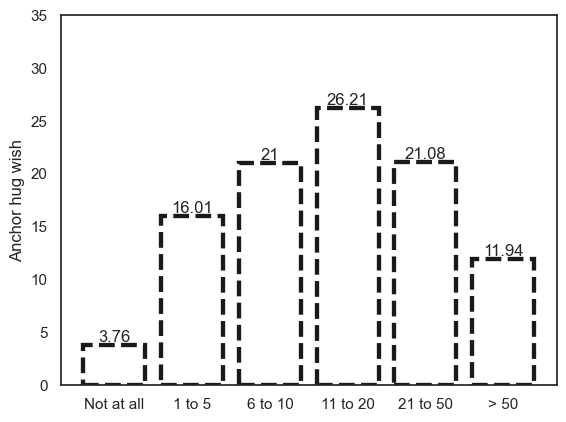

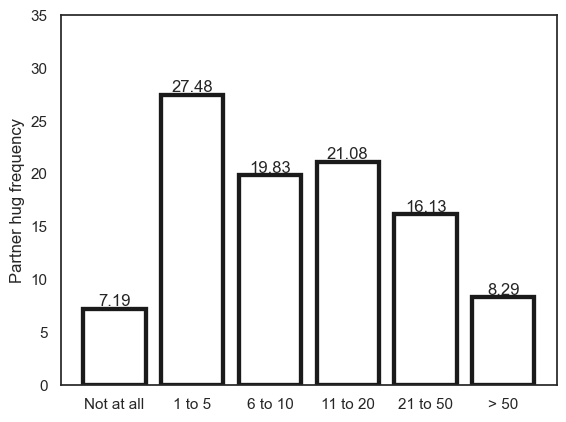

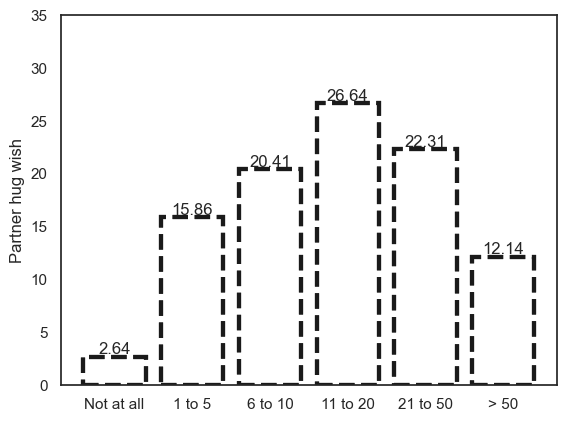

In [94]:
labels = ["Not at all",
          "1 to 5",
          "6 to 10",
          "11 to 20",
          "21 to 50",
          "> 50", ]

cols = frequency_map.columns.tolist()

lines_w = 3

for i, name in enumerate(cols):
    ax = sns.barplot(frequency_map[cols[i]],
                     linewidth=lines_w,
                     edgecolor='k',
                     facecolor=(0, 0, 0, 0)
                     )
    multiplier = 0
    for attribute, measurement in frequency_map[cols[i]].items():
        offset = multiplier
        rects = ax.bar(offset,
                       measurement,
                       label=attribute,
                       edgecolor='k',
                       facecolor=(0, 0, 0, 0)
                       )
        ax.bar_label(rects)
        multiplier += 1
    if i % 2 == 1:
        for bar in ax.patches:
            bar.set_linestyle('--')
            bar.set_linewidth(lines_w)
    elif i % 2 == 0:
        for bar in ax.patches:
            bar.set_linestyle('-')
            bar.set_linewidth(lines_w)

    plt.ylim(0, 35)
    plt.show()
    plt.close()
    # # plt.savefig('output/img_bg/frequency/' + name + '.png', dpi=350, transparent=False, bbox_inches='tight')

CORRELATION

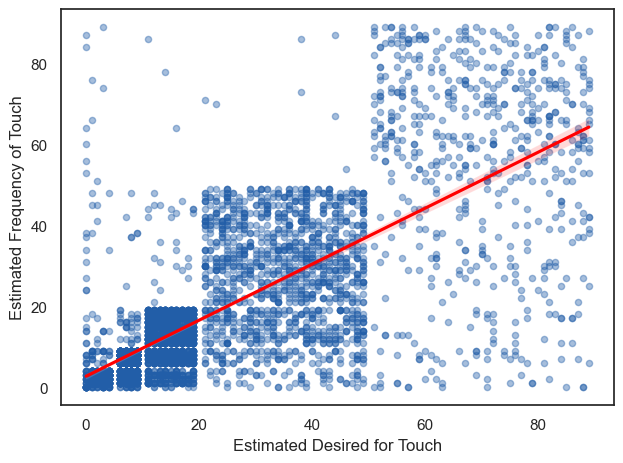

In [95]:
def map_to_random_value(response):
    if response == 0:
        return 0
    elif response == 1:
        return np.random.randint(1, 5)
    elif response == 2:
        return np.random.randint(6, 10)
    elif response == 3:
        return np.random.randint(11, 20)
    elif response == 4:
        return np.random.randint(21, 50)
    elif response == 5:
        return np.random.randint(51, 90)
    else:
        return np.nan


df2["x_value"] = df2["Anchor Wish for Touch"].apply(map_to_random_value)
df2["y_value"] = df2["Anchor Frequency of Touch"].apply(map_to_random_value)

sns.regplot(data=df2, x="x_value", y="y_value",
            scatter_kws={'alpha': 0.4, 's': 20, 'color': "#225ea8"},
            line_kws={'color': 'red'},
            order=1
            # x_jitter=0.1
            )

plt.xlabel("Estimated Desired for Touch")
plt.ylabel("Estimated Frequency of Touch")

plt.tight_layout()
plt.grid(False)
# plt.savefig('output/img_bg/scatter/scatter_anchor_desvsgiv.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Anchor Frequency of Touch vs. 5.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.227e-06 U_stat=6.568e+03
1.0_Anchor Wish for Touch vs. 5.0_Anchor Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.557e-06 U_stat=6.474e+03


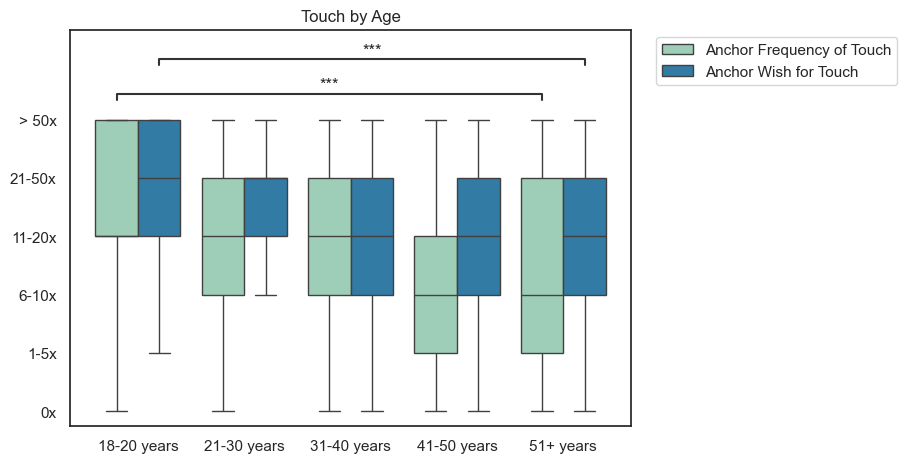

In [96]:
df_melted = df2.melt(id_vars='Anchor Age group',
                     value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )
pairs = [
    ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
    ((1, "Anchor Wish for Touch"), (5, "Anchor Wish for Touch")),
]

x = "Anchor Age group"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']

ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["18-20 years", "21-30 years", "31-40 years", "41-50 years", "51+ years"])
plt.title("Touch by Age")
# plt.savefig('output/img_bg/comparisons/Anchor-age.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Anchor Frequency of Touch vs. 5.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.429e-04 U_stat=1.183e+05
1.0_Anchor Wish for Touch vs. 5.0_Anchor Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:9.285e-01 U_stat=9.521e+04


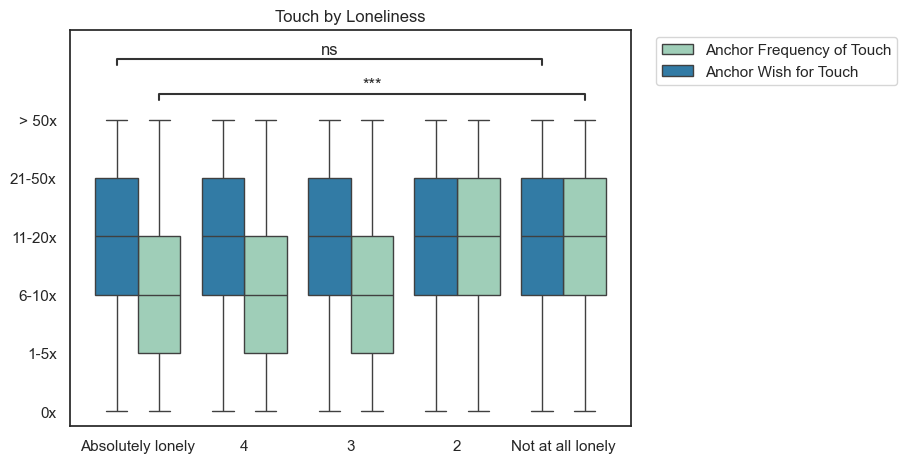

In [44]:
df_melted = df2.melt(id_vars='Anchor Loneliness',
                     value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )
pairs = [
    ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
    ((1, "Anchor Wish for Touch"), (5, "Anchor Wish for Touch")),
]

x = "Anchor Loneliness"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']

ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)

annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()

plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xlim(reversed(plt.xlim()))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
plt.title("Touch by Loneliness")
# plt.savefig('output/img_bg/comparisons/Anchor-loneliness.png', dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [58]:
pd.crosstab(df2["Anchor Frequency of Touch"], columns=['Anchor Loneliness'])

col_0,Anchor Loneliness
Anchor Frequency of Touch,
0.0,86
1.0,1016
2.0,1202
3.0,1287
4.0,1027
5.0,415


In [59]:
pd.crosstab(df2["Anchor Wish for Touch"], columns=['Anchor Loneliness'])

col_0,Anchor Loneliness
Anchor Wish for Touch,
0.0,65
1.0,489
2.0,1061
3.0,1527
4.0,1295
5.0,596


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Anchor Frequency of Touch vs. 5.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:3.925e-49 U_stat=2.304e+05
1.0_Anchor Wish for Touch vs. 5.0_Anchor Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:2.691e-43 U_stat=2.251e+05


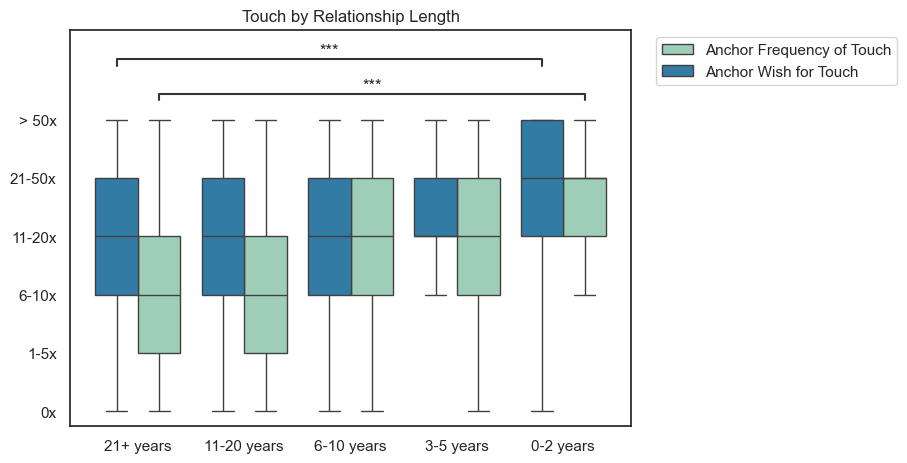

In [60]:
df_melted = df2.melt(id_vars='Relationship Length',
                     value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch',
                                 'Partner Frequency of Touch',
                                 'Partner Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

x = "Relationship Length"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']
pairs = [
    ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
    ((1, "Anchor Wish for Touch"), (5, "Anchor Wish for Touch")),
]
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.title("Touch by Relationship Length")
# plt.savefig("output/img_bg/comparisons/Anchor-relationlength.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

1.0_Anchor Frequency of Touch vs. 5.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.636e-15 U_stat=6.335e+02
1.0_Anchor Wish for Touch vs. 5.0_Anchor Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.710e-09 U_stat=1.421e+03


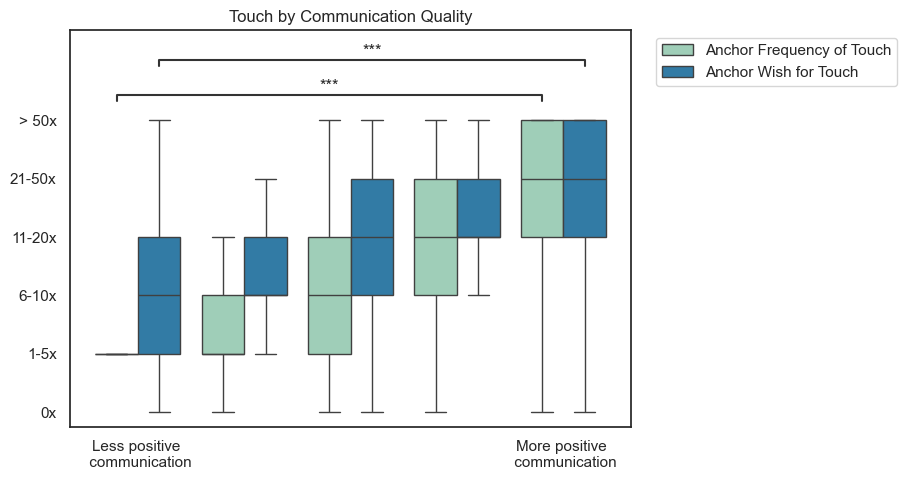

In [67]:
for i in range(0, len(df2)):
    if 7 < df2['Anchor Communication Quality'][i] <= 12:
        df2.loc[i, 'Anchor comm'] = 1
    elif 12 < df2['Anchor Communication Quality'][i] <= 17:
        df2.loc[i, 'Anchor comm'] = 2
    elif 17 < df2['Anchor Communication Quality'][i] <= 22:
        df2.loc[i, 'Anchor comm'] = 3
    elif 22 < df2['Anchor Communication Quality'][i] <= 27:
        df2.loc[i, 'Anchor comm'] = 4
    elif 27 < df2['Anchor Communication Quality'][i]:
        df2.loc[i, 'Anchor comm'] = 5

df_melted = df2.melt(id_vars='Anchor comm',
                     value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

x = "Anchor comm"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']
pairs = [
    ((1, "Anchor Frequency of Touch"), (5, "Anchor Frequency of Touch")),
    ((1, "Anchor Wish for Touch"), (5, "Anchor Wish for Touch")),
]
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)

annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")

plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4],
           labels=["Less positive \n communication", "", "", "", "More positive \n communication"])
plt.title("Touch by Communication Quality")
# plt.savefig("output/img_bg/comparisons/Anchor-communication.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0.0_Anchor Frequency of Touch vs. 3.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:8.959e-40 U_stat=6.395e+05
0.0_Anchor Wish for Touch vs. 3.0_Anchor Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:8.729e-24 U_stat=5.968e+05


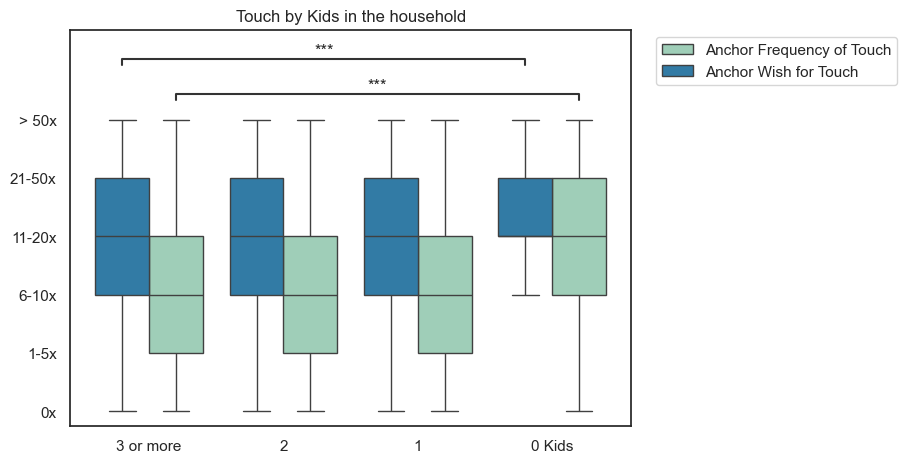

In [69]:
df_melted = df2.melt(id_vars='Kids',
                     value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

x = "Kids"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']
pairs = [
    ((0, "Anchor Frequency of Touch"), (3, "Anchor Frequency of Touch")),
    ((0, "Anchor Wish for Touch"), (3, "Anchor Wish for Touch")),
]
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.xlim(reversed(plt.xlim()))
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3], labels=["0 Kids", "1", "2", "3 or more"])
plt.title("Touch by Kids in the household")
# plt.savefig("output/img_bg/comparisons/Anchor-kids.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: p <= 1.00e-03

0.0_Anchor Frequency of Touch vs. 10.0_Anchor Frequency of Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:1.526e-03 U_stat=5.620e+02
0.0_Anchor Wish for Touch vs. 10.0_Anchor Wish for Touch: Mann-Whitney-Wilcoxon test two-sided, P_val:4.557e-02 U_stat=2.244e+03


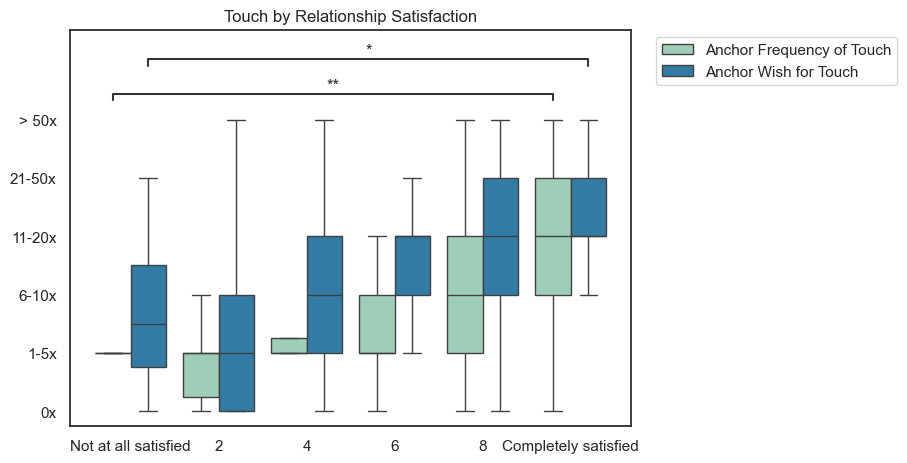

In [71]:
df_melted = df2.melt(id_vars='Anchor Relationship Satisfaction',
                     value_vars=['Anchor Frequency of Touch', 'Anchor Wish for Touch'],
                     var_name='Touch index', value_name='Touch Freq'
                     )

x = "Anchor Relationship Satisfaction"
y = "Touch Freq"
hue = "Touch index"
hue_order = ['Anchor Frequency of Touch', 'Anchor Wish for Touch']
pairs = [
    ((0, "Anchor Frequency of Touch"), (10, "Anchor Frequency of Touch")),
    ((0, "Anchor Wish for Touch"), (10, "Anchor Wish for Touch")),
]
ax = sns.boxplot(data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, palette='YlGnBu', showfliers=False)
annot = Annotator(ax, pairs, data=df_melted, x=x, y=y, hue=hue, hue_order=hue_order, )
annot.configure(test='Mann-Whitney', verbose=2,
                pvalue_thresholds=[[0.001, '***'], [0.01, '**'], [0.05, '*'], [1, 'ns']])

annot.apply_test()
annot.annotate()
plt.tight_layout()
plt.ylabel("")
plt.xlabel("")
plt.legend(loc='upper left', bbox_to_anchor=(1.03, 1))
plt.yticks([0, 1, 2, 3, 4, 5], labels=["0x", "1-5x", "6-10x", "11-20x", "21-50x", "> 50x"])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
plt.title("Touch by Relationship Satisfaction")
# plt.savefig("output/img_bg/comparisons/Anchor-relationsat.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

KDE

<Figure size 1400x800 with 0 Axes>

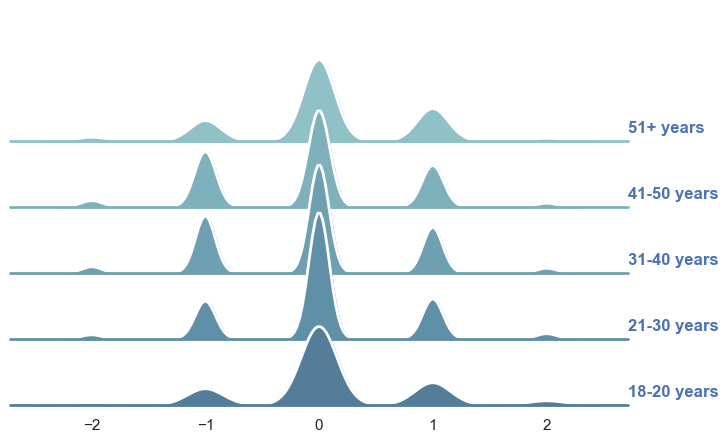

In [76]:
plt.figure(figsize=(14, 8))
duration_options = {
    1: '18-20 years',
    2: '21-30 years',
    3: '31-40 years',
    4: '41-50 years',
    5: '51+ years'
}

df2['text Relationship'] = df2['Anchor Age group'].map(duration_options)

a = 'text Relationship'

kdf = df2.sort_values(
    by="Anchor Age group",
    ascending=False
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=kdf,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           #  labels=["My Partner\n wants a lot \nmore touch \nthan I",
           #         "My Partner\n wants more \ntouch \nthan I",
           #         "I want the\n same amount \nof touch \nas my partner",
           #         "I want \nmore touch \nthan \nmy partner",
           #         "I want a \nlot more \ntouch than \nmy partner"
           #         ],
           )
# plt.savefig("output/img_bg/KDE_linear_age.png", dpi=350, transparent=False, bbox_inches='tight')
# plt.title("Difference by Age")
plt.show()

<Figure size 1400x800 with 0 Axes>

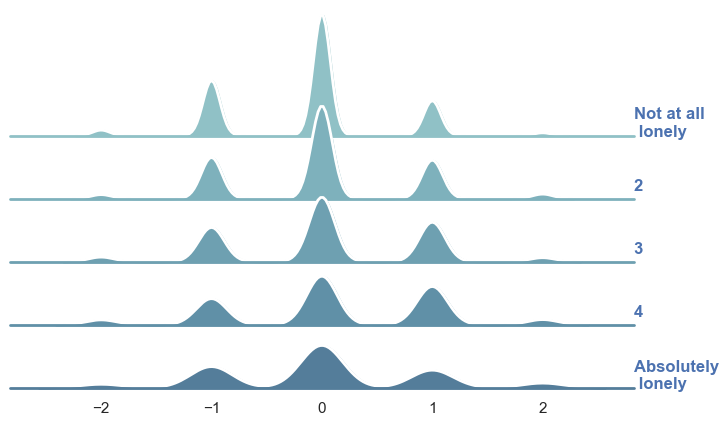

In [77]:
plt.figure(figsize=(14, 8))
duration_options = {
    1: 'Not at all\n lonely',
    2: '2',
    3: '3',
    4: '4',
    5: 'Absolutely\n lonely'
}

df2['text Relationship'] = df2['Anchor Loneliness'].map(duration_options)

a = 'text Relationship'

kdf = df2.sort_values(
    by="Anchor Loneliness",
    ascending=True
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=kdf,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2]
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           # labels=["My Partner\n wants a lot \nmore touch \nthan I",
           #         "My Partner\n wants more \ntouch \nthan I",
           #         "I want the\n same amount \nof touch \nas my partner",
           #         "I want \nmore touch \nthan \nmy partner",
           #         "I want a \nlot more \ntouch than \nmy partner"
           #         ],
           )
# plt.title("Discrepancy by Loneliness")
# plt.savefig("output/img_bg/KDE_linear_loneliness.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

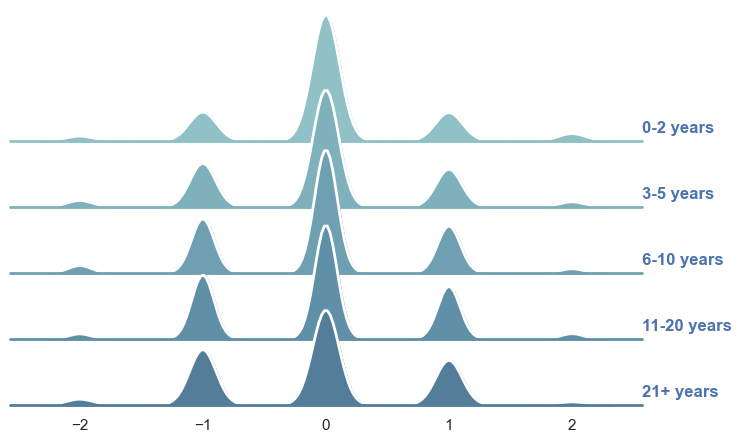

In [78]:
plt.figure(figsize=(14, 8))
duration_options = {
    1: '0-2 years',
    2: '3-5 years',
    3: '6-10 years',
    4: '11-20 years',
    5: '21+ years'
}

df2['text Relationship'] = df2['Relationship Length'].map(duration_options)

a = 'text Relationship'

kdf = df2.sort_values(
    by="Relationship Length",
    ascending=True
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=kdf,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           # labels=["My Partner wants \na lot more\n touch than I",
           #         "My Partner \nwants more \ntouch than I",
           #         "I want the same \namount of touch \nas my partner",
           #         "I want more \ntouch than \nmy partner",
           #         "I want a lot \n more touch \nthan my partner"
           #         ],
           )
# plt.title("Discrepancy by Relationship Length")
# plt.savefig("output/img_bg/KDE_linear.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

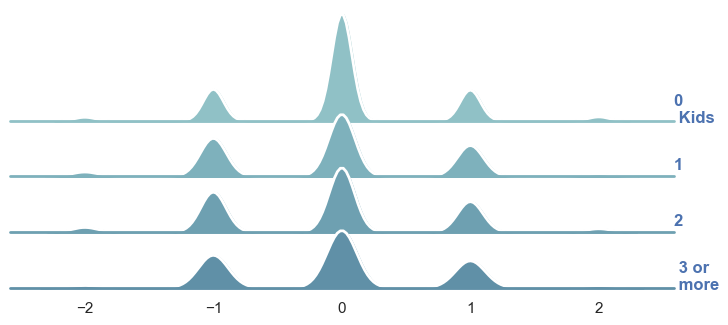

In [79]:
plt.figure(figsize=(14, 8))
duration_options = {
    0: '0 \n Kids',
    1: '1',
    2: '2',
    3: ' 3 or \n more',
}

df['text Relationship'] = df['Kids'].map(duration_options)

a = 'text Relationship'

kdf = df.sort_values(
    by="Kids",
    ascending=True
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=kdf,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           # labels=["My Partner wants \na lot more\n touch than I",
           #         "My Partner \nwants more \ntouch than I",
           #         "I want the same \namount of touch \nas my partner",
           #         "I want more \ntouch than \nmy partner",
           #         "I want a lot \n more touch \nthan my partner"
           #         ],
           )
# plt.title("Discrepancy by Kids in the household")
# plt.savefig("output/img_bg/KDE_linear-kids.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

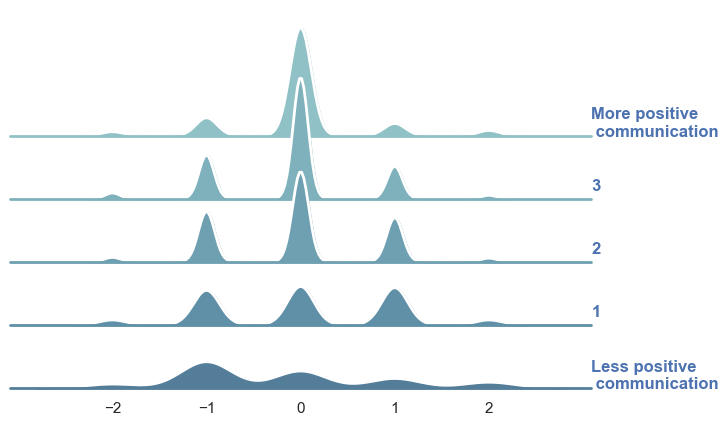

In [80]:
plt.figure(figsize=(14, 8))
duration_options = {
    1: 'Less positive \n communication',
    2: '1',
    3: '2',
    4: '3',
    5: "More positive \n communication"
}
df['text Relationship'] = df['Anchor comm'].map(duration_options)

a = 'text Relationship'

kdf = df.sort_values(
    by="Anchor comm",
    ascending=False
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=kdf,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2],
           # labels=["My Partner $\mathbf{wants}$ \n$\mathbf{a}$ $\mathbf{lot}$ $\mathbf{more}$\n touch than I",
           #                               "My Partner \n$\mathbf{wants}$ $\mathbf{more}$ \ntouch than I",
           #                               "I $\mathbf{want}$ $\mathbf{the}$\n $\mathbf{same}$ amount of \ntouch as my partner",
           #                               "I $\mathbf{want}$ $\mathbf{more}$ \ntouch than \nmy partner",
           #                               "I $\mathbf{want}$ $\mathbf{a}$ $\mathbf{lot}$ \n $\mathbf{more}$ touch \nthan my partner"
           #                               ],
           # labels=["My Partner wants \na lot more\n touch than I",
           #         "My Partner \nwants more \ntouch than I",
           #         "I want the same \namount of touch \nas my partner",
           #         "I want more \ntouch than \nmy partner",
           #         "I want a lot \n more touch \nthan my partner"
           #         ],
           )

# plt.title("Discrepancy by Communication quality")
# plt.savefig("output/img_bg/KDE_linear-com.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

<Figure size 1400x800 with 0 Axes>

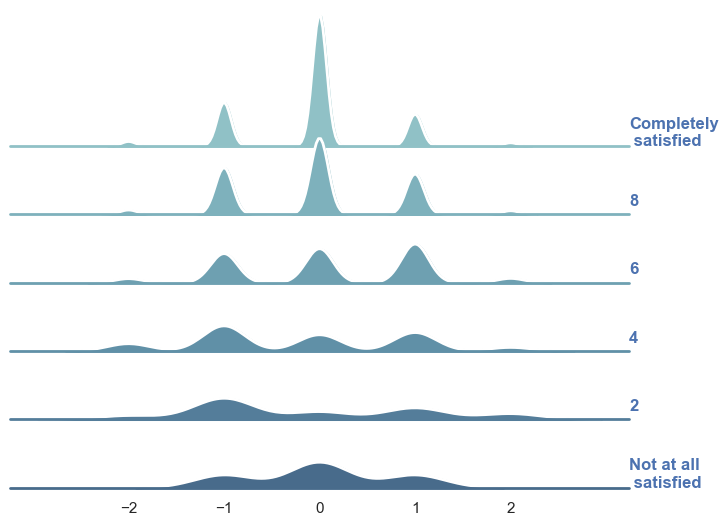

In [90]:
plt.figure(figsize=(14, 8))
duration_options = {
    0: 'Not at all\n satisfied',
    2: '2',
    4: '4',
    6: '6',
    8: '8',
    10: 'Completely\n satisfied'
}
df['text Relationship'] = df['Anchor Relationship Satisfaction'].map(duration_options)

a = 'text Relationship'

kdf = df.sort_values(
    by="Anchor Relationship Satisfaction",
    ascending=False
)

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(data=kdf,
                  row=a,
                  hue=a,
                  aspect=8,
                  height=1,
                  palette=pal
                  )
g.map(sns.kdeplot,
      "Discrepancy",
      bw_adjust=.5,
      clip_on=False,
      fill=True,
      alpha=1,
      linewidth=1.5)

g.map(sns.kdeplot, "Discrepancy", color="w", clip_on=False, lw=2, bw_adjust=.5)
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


def label(x, color, label):
    ax = plt.gca()
    ax.text(1, .1, label, fontweight="bold", color="b",
            ha="left", va="center", transform=ax.transAxes)


g.map(label, a)
g.figure.subplots_adjust(hspace=-.5)

g.set_titles("")
g.set_xlabels("")
g.set()
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
plt.xticks(ticks=[-2, -1, 0, 1, 2])

# plt.title("")
# plt.savefig("output/img_bg/KDE_linear-relsat.png", dpi=350, transparent=False, bbox_inches='tight')
plt.show()

In [170]:
# sns.boxplot(data=df,
#             x="Relationship Length",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["0-2 years", "3-5 years", "6-10 years", "11-20 years", "21+ years"])
# # plt.savefig("output/img_bg/comparisons/Anchor-rel-len-deficit.png", dpi=350, transparent=False)

In [171]:
# sns.boxplot(data=df,
#             x="Anchor Loneliness",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.savefig("output/img_bg/comparisons/Anchor-Loneliness.png", dpi=350, transparent=False)

In [172]:
# sns.boxplot(data=df,
#             x="Partner Loneliness",
#             y="Partner Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# #plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Not at all lonely", "2", "3", "4", "Absolutely lonely"])
# plt.savefig("output/img_bg/comparisons/Partner-Loneliness.png", dpi=350, transparent=False)

In [173]:
# sns.boxplot(data=df,
#             x="Anchor Relationship Satisfaction",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
# plt.savefig("output/img_bg/comparisons/Anchor-rel-sat-deficit.png", dpi=350, transparent=False)

In [174]:
# Following "User's guide to correlation coefficients" (https://pmc.ncbi.nlm.nih.gov/articles/PMC6107969/)

In [175]:
 # sns.boxplot(data=df,
#             x="Kids",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3], labels=["0 Kids", "1", "2", "3 or more"])
# plt.savefig("output/img_bg/comparisons/Anchor-kids-deficit.png", dpi=350, transparent=False)

Text(0.5, 0, '')

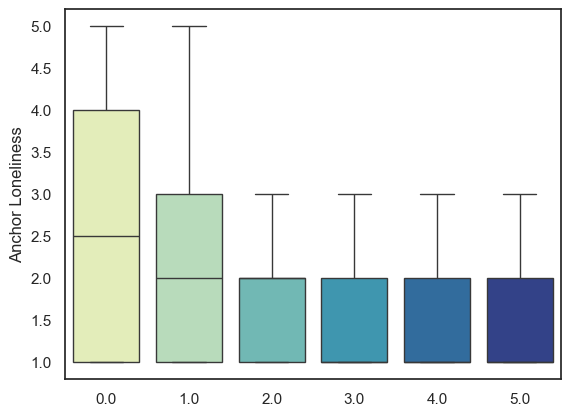

In [88]:
# sns.boxplot(data=df2,
#             x="Anchor Frequency of Touch",
#             y="Anchor Loneliness",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# # plt.ylabel("Touch Deprivation")
# # plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=["Not at all satisfied", "2", "4", "6", "8", "Completely satisfied"])
#
# # plt.savefig("output/img_bg/comparisons/Anchor-life-sat-deficit.png", dpi=350, transparent=False)

In [177]:
# sns.boxplot(data=df,
#             x="Anchor comm",
#             y="Anchor Deprivation of Touch",
#             showfliers=False,
#             palette='YlGnBu',
#             )
# # plt.ylim(-4.5, 2.5)
# plt.xlabel("")
# plt.ylabel("Touch Deprivation")
# plt.xticks(ticks=[0, 1, 2, 3, 4],
#            labels=["Less positive \n communication", "", "", "", "More positive \n communication"])

# plt.savefig("output/img_bg/comparisons/Anchor-com-deficit.png", dpi=350, transparent=False)